<a href="https://colab.research.google.com/github/ENKI0311/UT-Austin_Coursework/blob/main/FullCode_Additional_ETMT_Project_LearnerNotebook_JMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

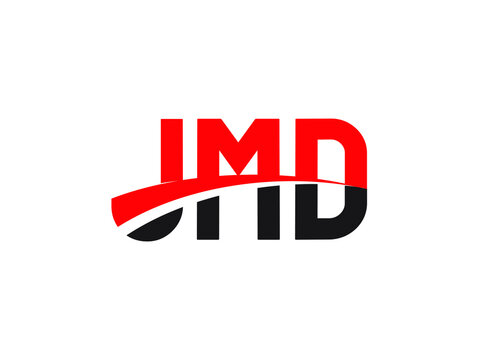

# JMD Promotion Prediction Model

### By: John Chilton

## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [ ]:
!pip install nb-black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [ ]:
!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn

Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [ ]:
!pip install xgboost

## Importing necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/employee_promotion.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000,7,0,85.000,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.000,5,0,59.000,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.000,6,0,63.000,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.000,5,0,83.000,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000,5,0,54.000,0


In [ ]:
df.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.000,4,0,51.000,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.000,6,1,67.000,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.000,3,0,52.000,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,78.000,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.000,2,0,49.000,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


In [ ]:
df.shape

(54808, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
df.describe().sum().T

employee_id            312515.162
no_of_trainings         54823.862
age                     55031.464
previous_year_rating    50704.589
length_of_service       54871.131
awards_won              54809.174
avg_training_score      52651.234
is_promoted             54809.364
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index

RangeIndex(start=0, stop=54808, step=1)

In [ ]:
df.mean(axis=1)

0       8192.000
1       8155.125
2        951.000
3        330.500
4       6133.625
          ...   
54803    397.125
54804   9336.750
54805   1754.125
54806   1949.571
54807   6451.125
Length: 54808, dtype: float64

In [ ]:
df.median(axis=1)

0        6.500
1        4.500
2        5.000
3        6.000
4        2.500
         ...  
54803   10.000
54804    4.000
54805    4.000
54806    1.000
54807    3.000
Length: 54808, dtype: float64

In [ ]:
df.mode()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,1,Sales & Marketing,region_2,Bachelor's,m,other,1.000,30.000,3.000,3.000,0.000,50.000,0.000
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,78292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54804,78294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54805,78296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54806,78297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.std(axis=1)

0       23130.884
1       23025.780
2        2651.514
3         893.792
4       17298.429
           ...   
54803    1064.218
54804   26367.111
54805    4915.022
54806    5143.540
54807   18213.008
Length: 54808, dtype: float64

In [ ]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0


In [ ]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [ ]:
df['avg_training_score'].unique()

array([49., 60., 50., 73., 85., 59., 63., 83., 54., 77., 80., 84., 51.,
       46., 75., 57., 70., 68., 79., 44., 72., nan, 48., 58., 87., 47.,
       52., 88., 71., 65., 62., 53., 78., 91., 82., 69., 55., 74., 86.,
       90., 92., 67., 89., 56., 76., 81., 64., 39., 94., 93., 66., 95.,
       42., 96., 40., 99., 43., 97., 41., 98.])

In [ ]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [ ]:
# Checking for NaN values in the 'department' and 'education' columns
nan_check = df[df['department'] == 'Technology']['education'].isna().sum()
nan_check

99

In [ ]:
# Checking for NaN values in the 'department' and 'region' columns
nan_check = df[df['department'] == 'Technology']['region'].isna().sum()
nan_check

0

In [ ]:
#  Checking the summary of the categorical features in the dataset
df.describe(include=["object"]).T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [ ]:
# Looping through each column in the DataFrame that has an object data type
for i in df.describe(include=["object"]).columns:
    # Printing the name of the column
    print("Unique values in", i, "are :")
    # Printing the count of unique values in the column
    print(df[i].value_counts())
    # Printing a separator line of asterisks for better readability
    print("*" * 50);

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
df.drop(columns="employee_id", inplace=True)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
df.drop(columns="department", inplace=True)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
df.drop(columns="region", inplace=True)

In [ ]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
df.drop(columns="education", inplace=True)

In [ ]:
df["is_promoted"].value_counts(1)

0   0.915
1   0.085
Name: is_promoted, dtype: float64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the distribution of average training score of  employee ?
2. How is the distribution age of  employee ?
3. How does the change in length of service (`length_of_service`) vary by the employee's promotion status (`is_promoted`)?
4. How does the previous rating(`previous_year_rating`) vary by the employee's promotion status (`is_promoted`)?
5. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

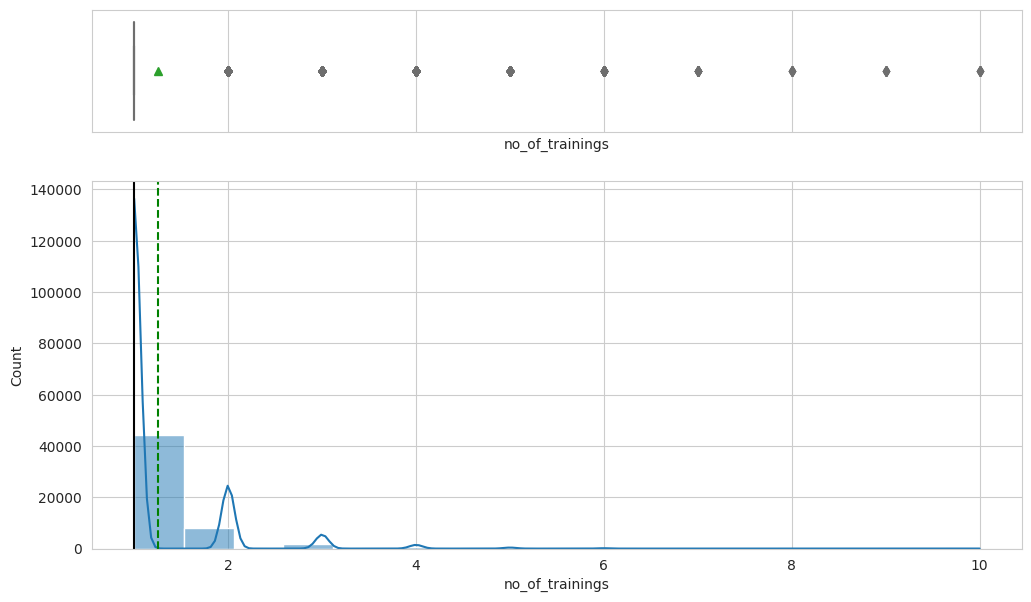

In [ ]:
# Histogram and Boxplot of no_of_trainings
histogram_boxplot(df, "no_of_trainings", kde=True);

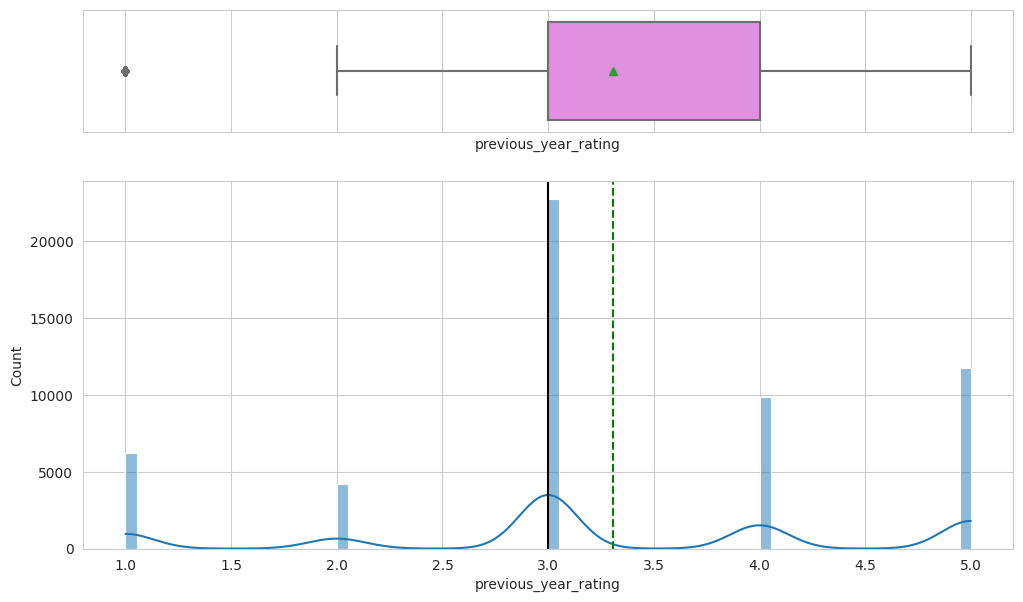

In [ ]:
# Histogram and Boxplot of previous_year_rating
histogram_boxplot(df, "previous_year_rating", kde=True);

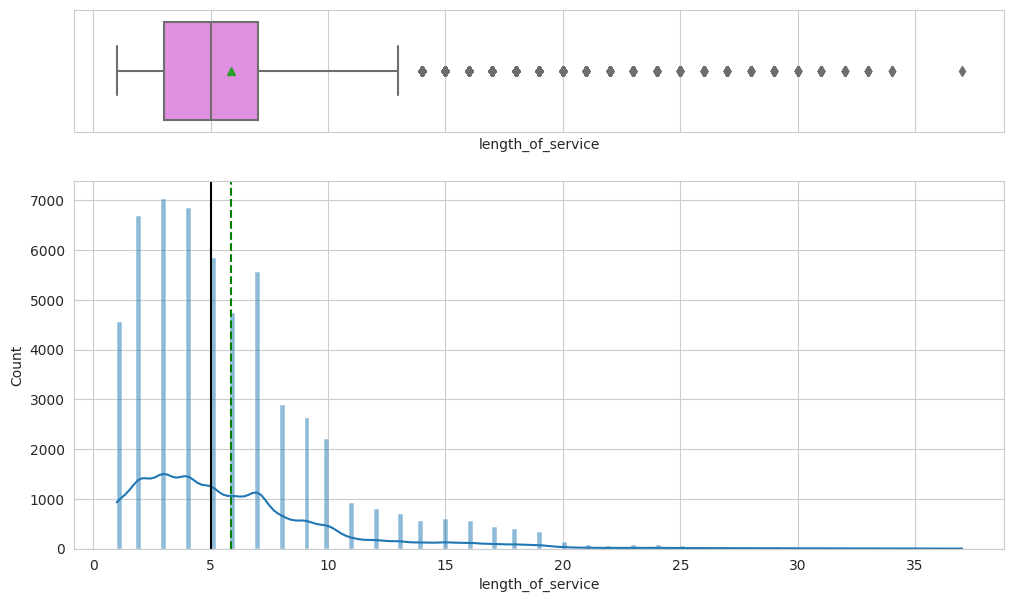

In [ ]:
# Histogram and Boxplot of length_of_service
histogram_boxplot(df, "length_of_service", kde=True);

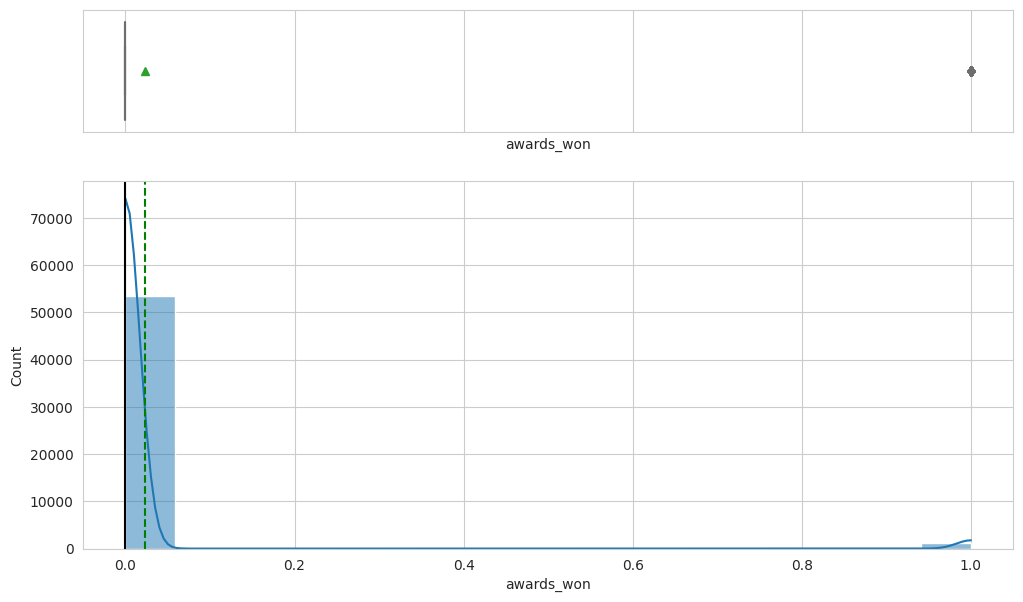

In [ ]:
# Histogram and Boxplot of awards_won
histogram_boxplot(df, "awards_won", kde=True);

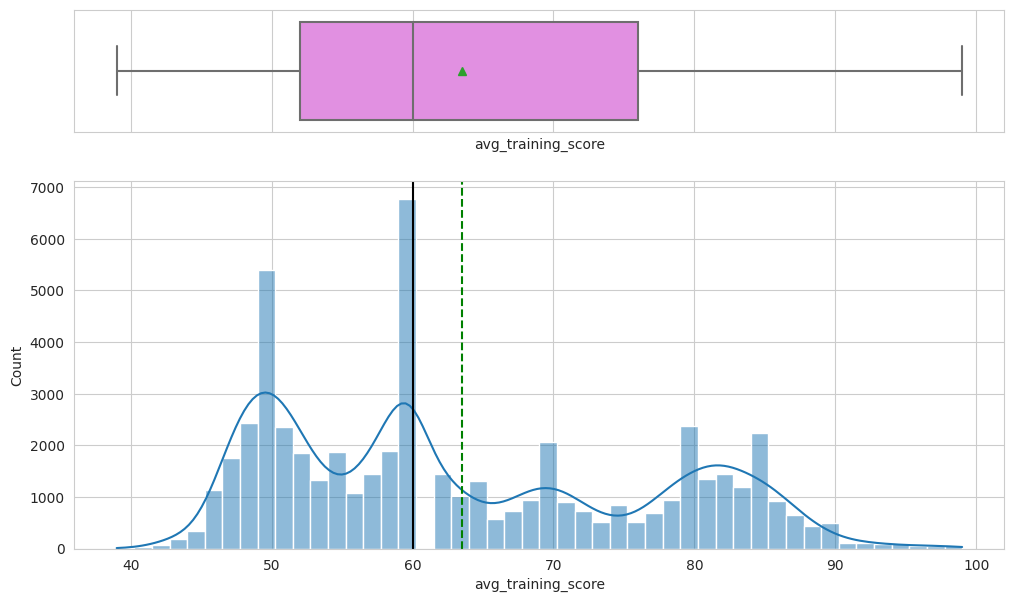

In [ ]:
# Histogram and Boxplot of avg_training_score
histogram_boxplot(df, "avg_training_score", kde=True);

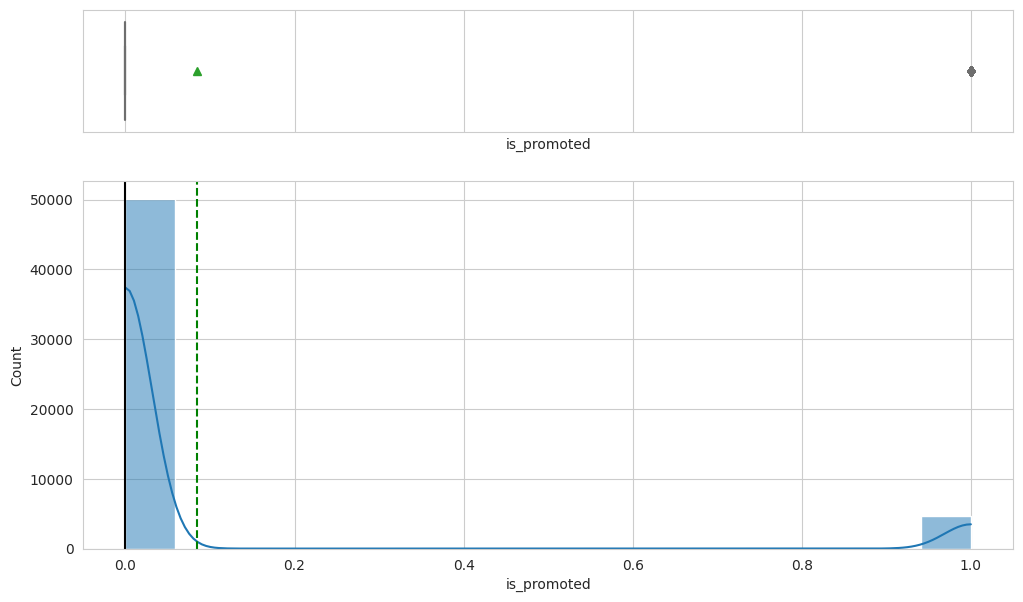

In [ ]:
# Histogram and Boxplot of is_promoted
histogram_boxplot(df, "is_promoted", kde=True);

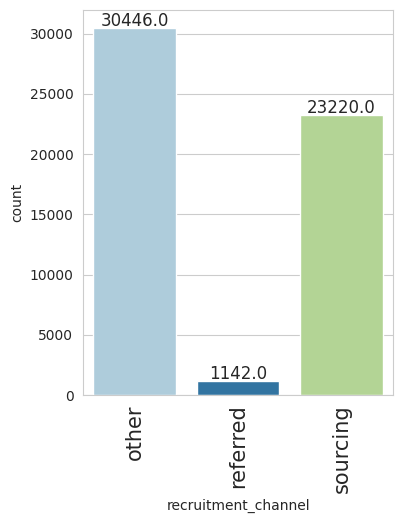

In [ ]:
# Labeled Barplot of recruitment_channel
labeled_barplot(df, "recruitment_channel");

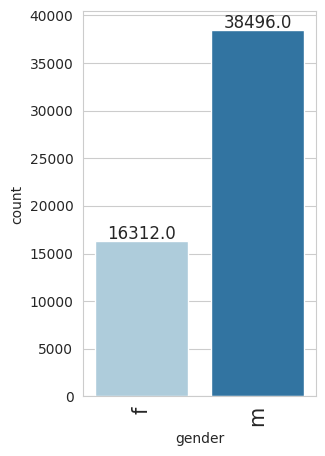

In [ ]:
# Labeled Barplot of gender
labeled_barplot(df, "gender");

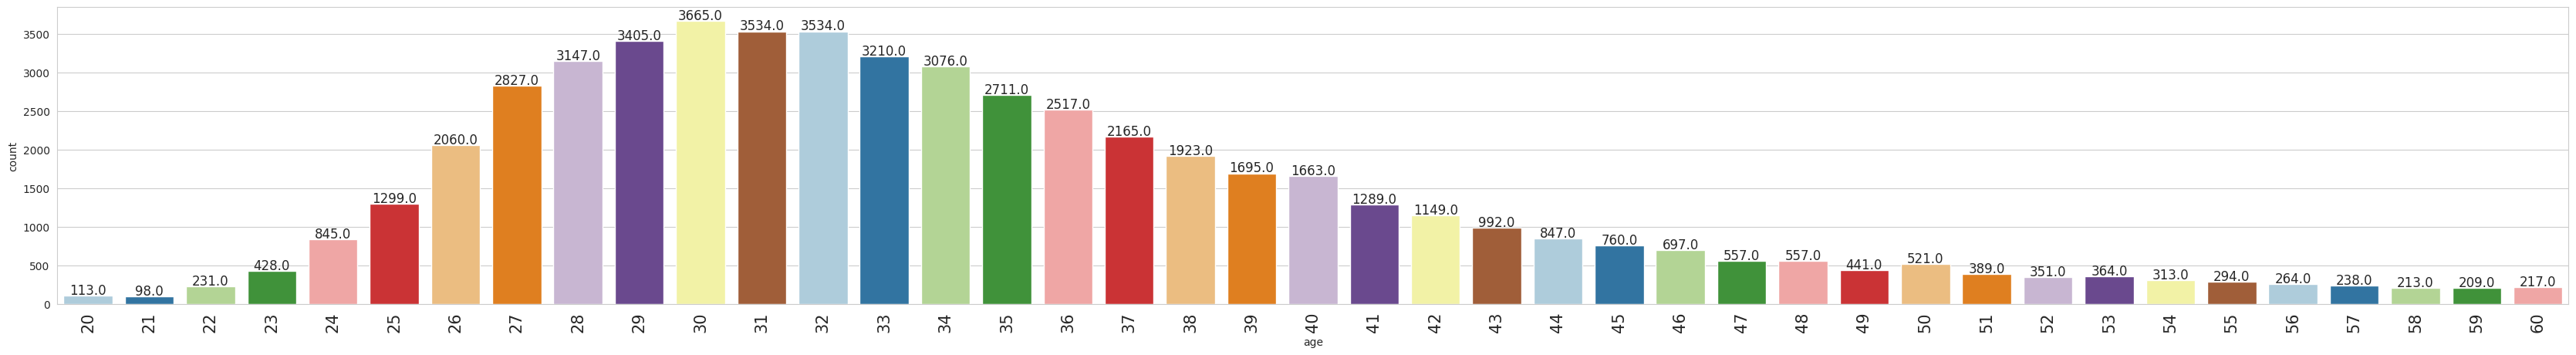

In [ ]:
# Labeled Barplot of age
labeled_barplot(df, "age");

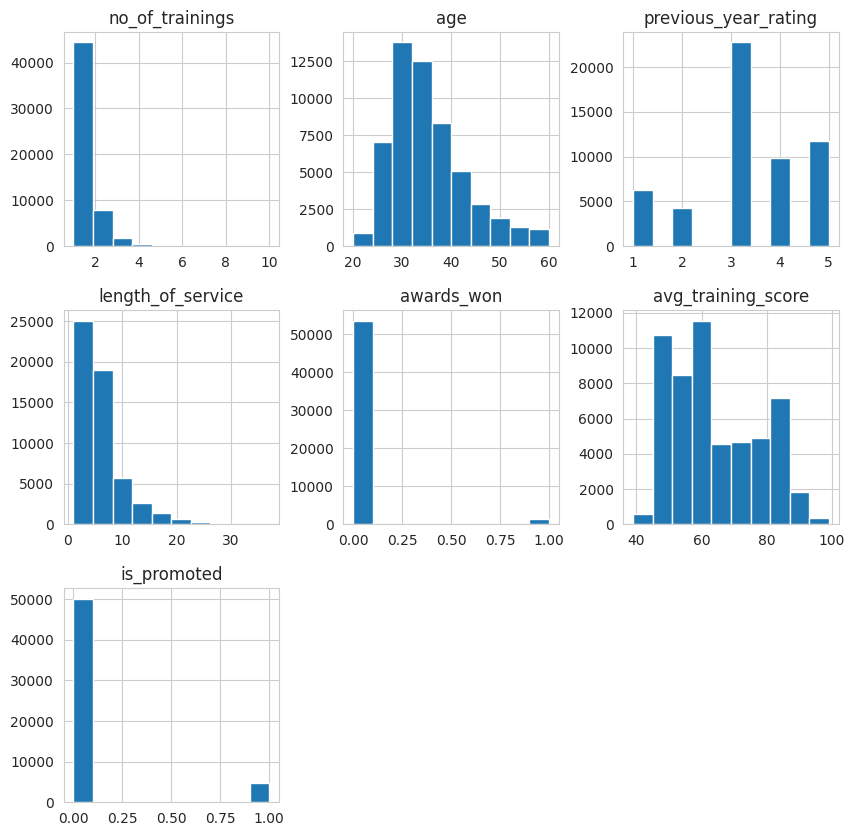

In [ ]:
# Histogram of the data
df.hist(figsize=(10, 10))
plt.show();

### Bivariate Distributions

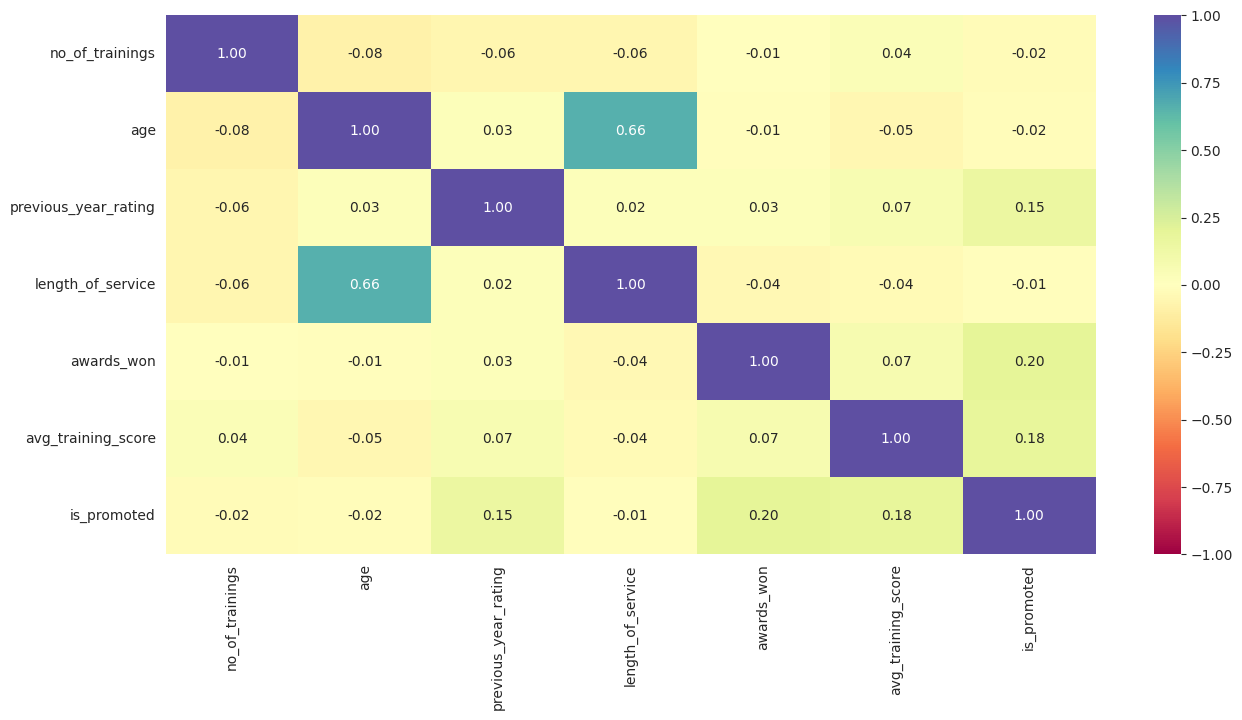

In [ ]:
# Heatmap of the data set to look for corrilations in the data.
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show();

is_promoted               0     1    All
previous_year_rating                    
All                   50140  4668  54808
5.0                    9820  1921  11741
3.0                   21048  1694  22742
4.0                    9093   784   9877
2.0                    4044   181   4225
1.0                    6135    88   6223
------------------------------------------------------------------------------------------------------------------------


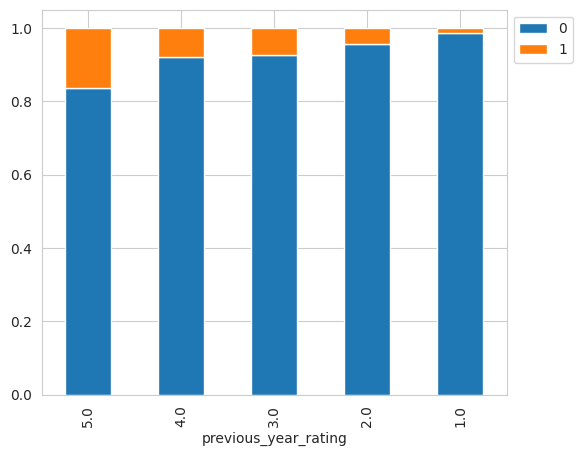

In [ ]:
# Stacked Barplot of previous_year_rating vs is_promoted
stacked_barplot(df, "previous_year_rating", "is_promoted");

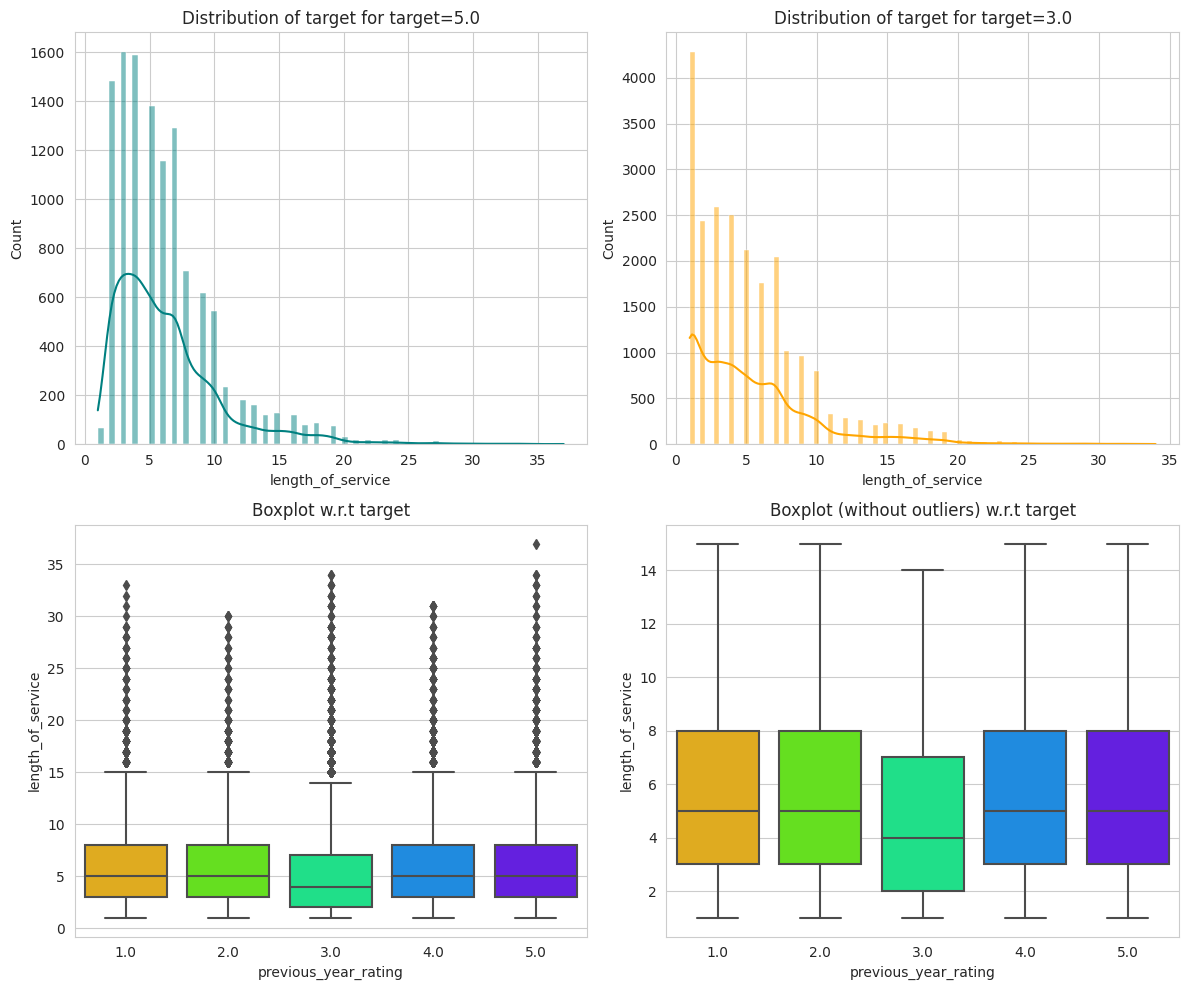

In [ ]:
# Distribution plot of length_of_service vs previous_year_rating
distribution_plot_wrt_target(df, "length_of_service", "previous_year_rating");

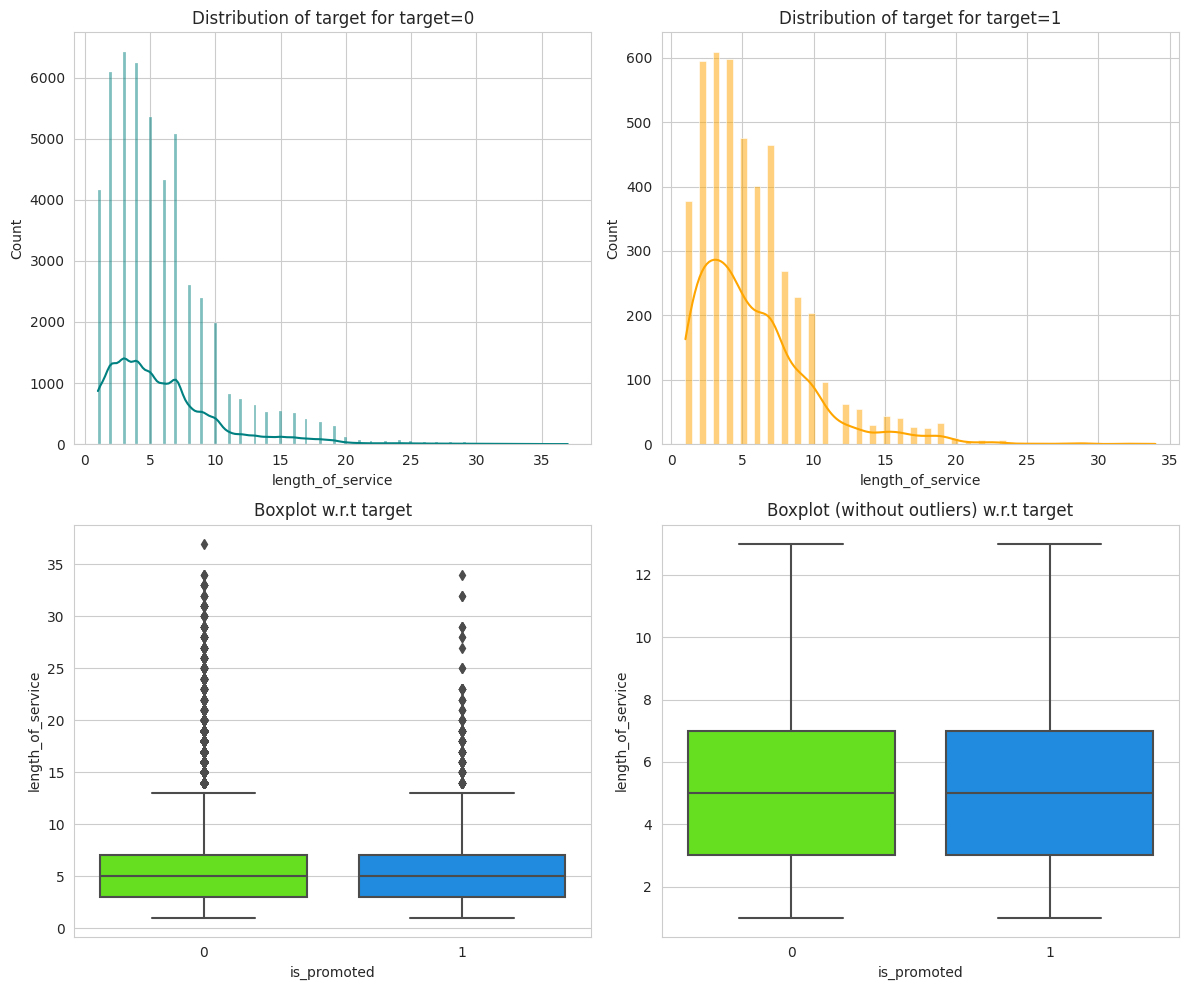

In [ ]:
# Distribution plot of length_of_service vs is_promoted
distribution_plot_wrt_target(df, "length_of_service", "is_promoted");

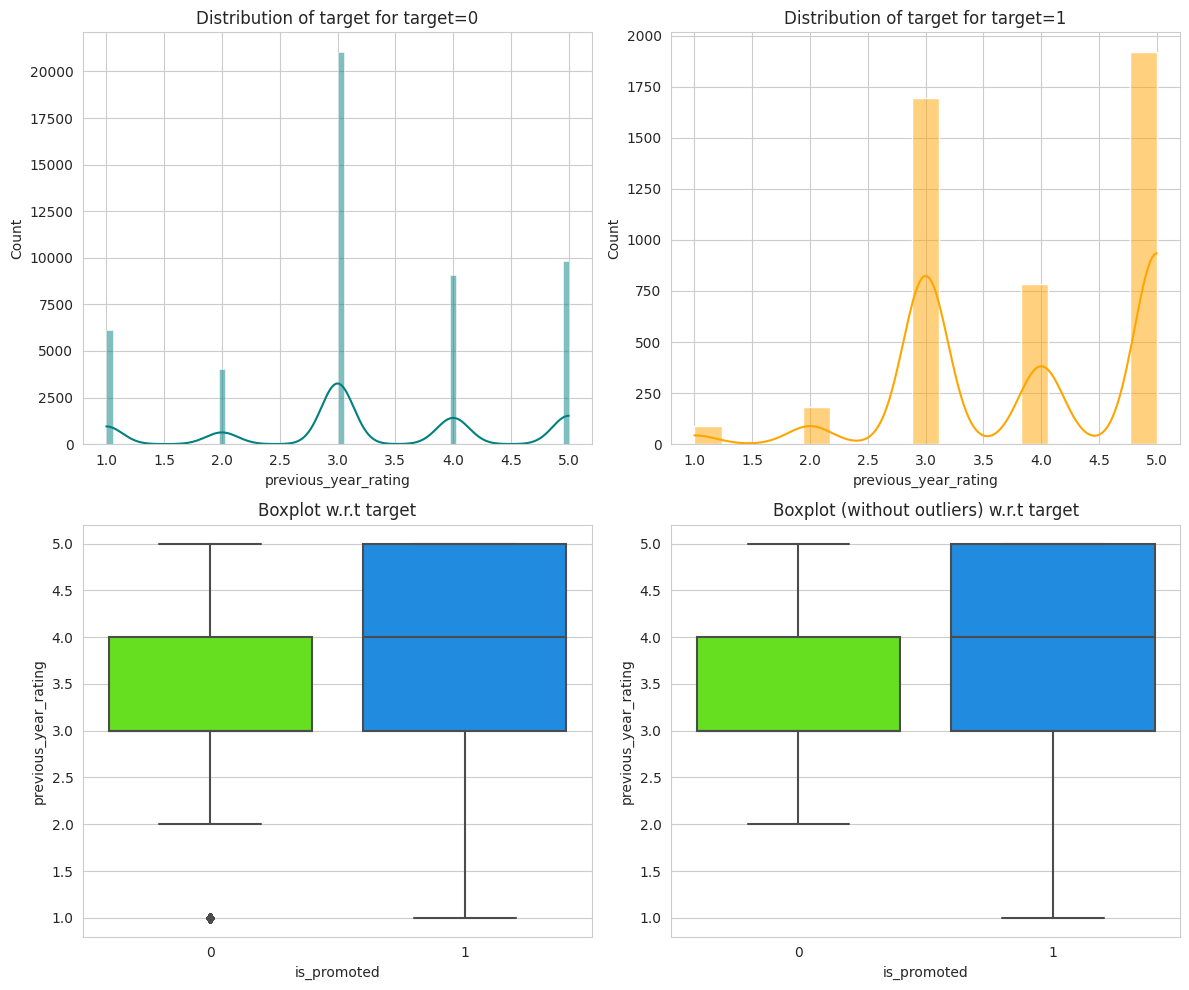

In [ ]:
# Distribution plot of previous_year_rating vs is_promoted
distribution_plot_wrt_target(df, "previous_year_rating", "is_promoted");

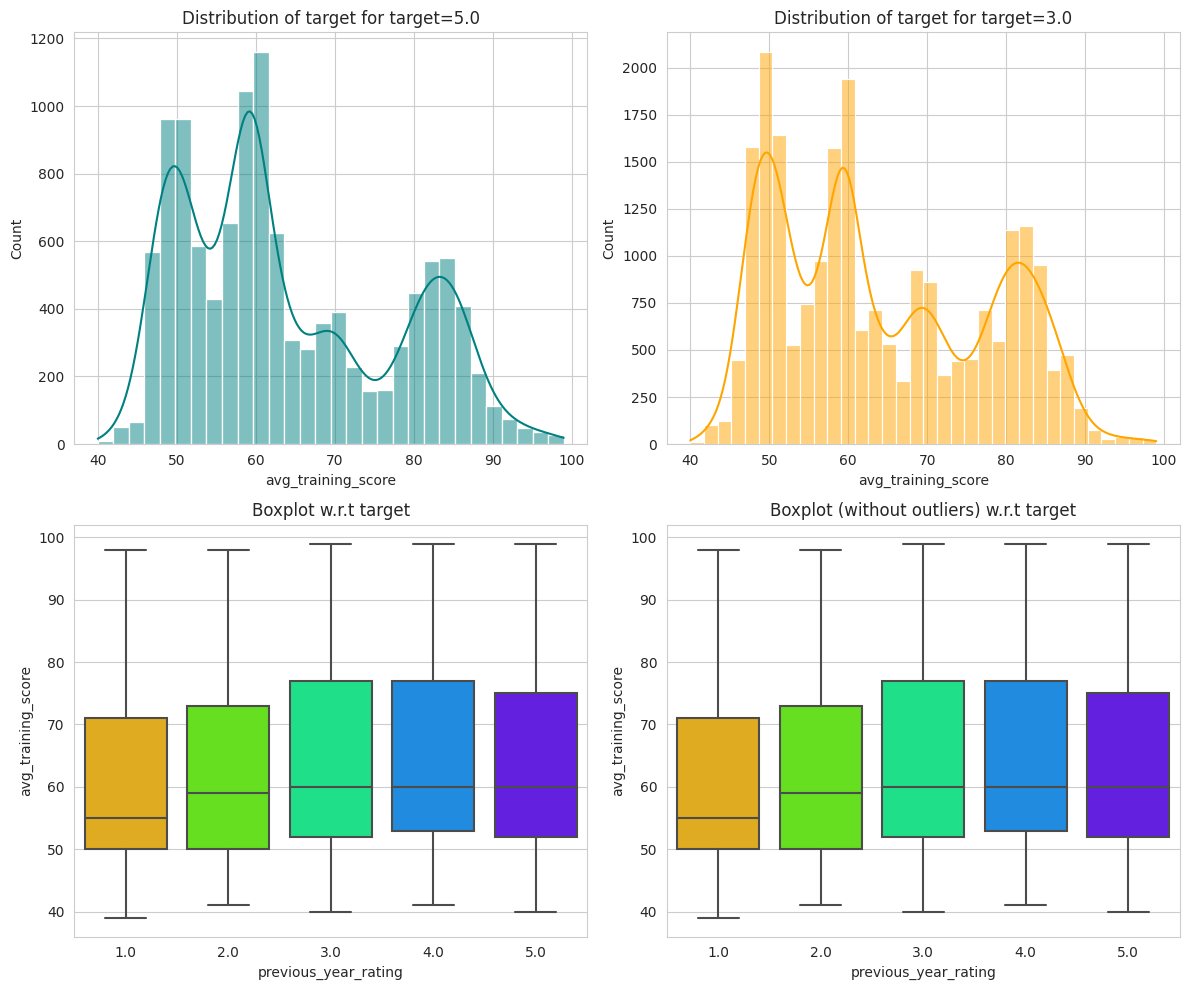

In [ ]:
# Distribution plot of avg_training_score vs previous_year_rating
distribution_plot_wrt_target(df, "avg_training_score", "previous_year_rating");

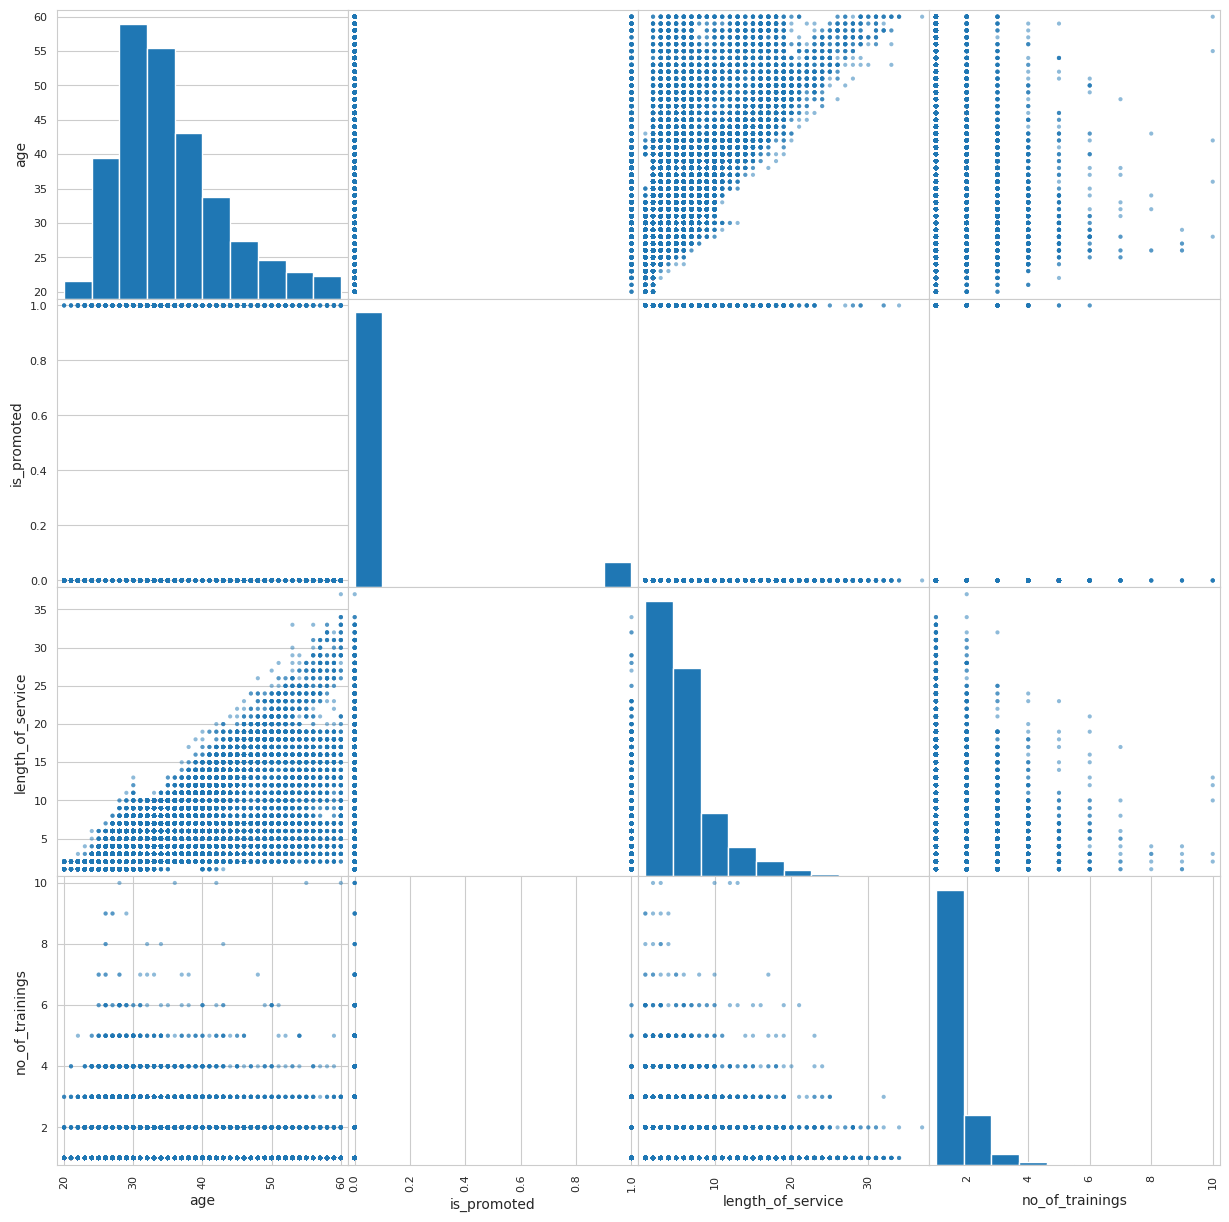

In [ ]:
from pandas.plotting import scatter_matrix

# List of attributes you want to view pairwise relationships for
attributes = ["age", "is_promoted", "length_of_service", "no_of_trainings"]

# Using the scatter_matrix function to plot pairwise relationships
# The figsize parameter allows us to specify the size of the figure. You can adjust (15, 15) as needed.
scatter_matrix(df[attributes], figsize=(15, 15))


# Show the plot
plt.show();

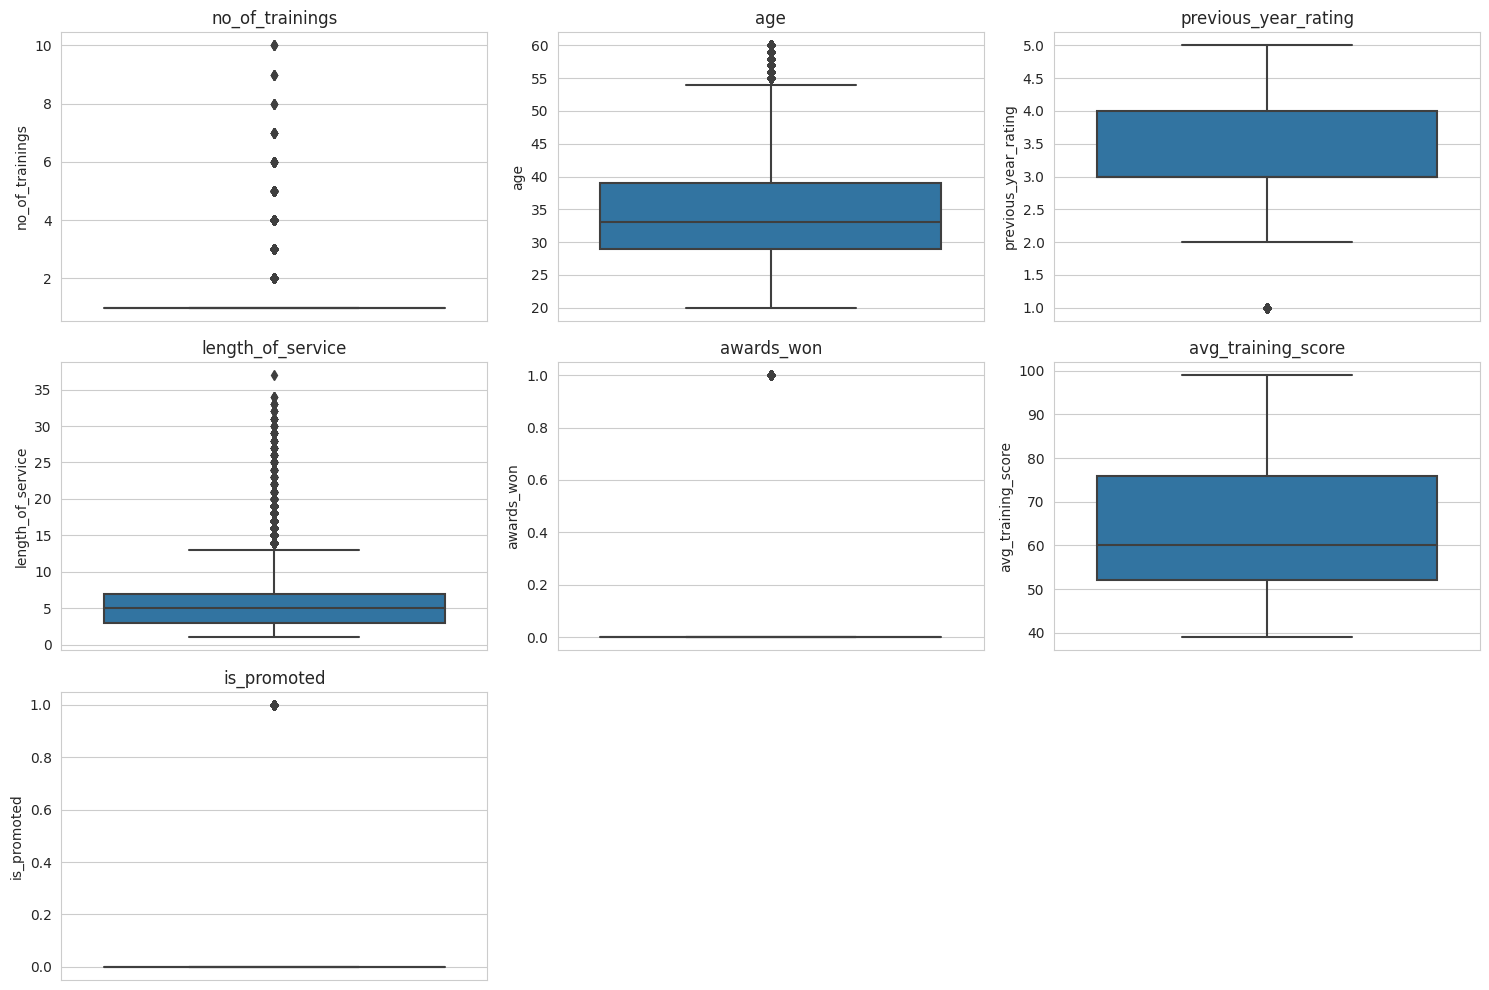

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifying numerical columns for the boxplot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Data Pre-processing

### Train-Test Split

In [ ]:
X = df.drop(["is_promoted"], axis=1)
y = df["is_promoted"]

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and temporary set (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Splitting temporary set into test and validation sets (75% temp, 25% validation)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Printing the shapes of the resulting sets
print(X_train.shape, X_val.shape, X_test.shape)

(43846, 8) (2741, 8) (8221, 8)


### Missing value imputation

In [ ]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data (using the same imputer)
X_val[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_val[["previous_year_rating", "avg_training_score"]]
)

# Transform the test data (using the same imputer)
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(
    X_test[["previous_year_rating", "avg_training_score"]]
)

In [ ]:
from sklearn.model_selection import train_test_split

# Check for missing values
missing_values = df.isnull().sum()

# One-hot encode categorical variables
categorical_cols = ['gender', 'recruitment_channel']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Handle missing values (filling with 0 for simplicity, but other methods could be more appropriate)
df_encoded = df_encoded.fillna(0)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Output the result of missing value check and shape of the split data
missing_values, X_train.shape, X_val.shape, y_train.shape, y_val.shape

(gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 awards_won              0
 avg_training_score      0
 is_promoted             0
 dtype: int64,
 (38365, 8),
 (16443, 8),
 (38365,),
 (16443,))

In [ ]:
# Handle missing values using median for 'previous_year_rating' and 'avg_training_score'
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
df['avg_training_score'].fillna(df['avg_training_score'].median(), inplace=True)

# Check if there are any more missing values
missing_values_updated = df.isnull().sum()

# One-hot encoding categorical variables
df_encoded_updated = pd.get_dummies(df, columns=categorical_cols)


# Separating features and target variable
X_updated = df_encoded_updated.drop(['is_promoted'], axis=1)
y_updated = df_encoded_updated['is_promoted']

# Splitting the data into training and validation sets
X_train_updated, X_val_updated, y_train_updated, y_val_updated = train_test_split(X_updated, y_updated, test_size=0.3, random_state=1)

# Output the result of the updated missing value check and shape of the split data
missing_values_updated, X_train_updated.shape, X_val_updated.shape, y_train_updated.shape, y_val_updated.shape

(gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 awards_won              0
 avg_training_score      0
 is_promoted             0
 dtype: int64,
 (38365, 11),
 (16443, 11),
 (38365,),
 (16443,))

In [ ]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


### Encoding categorical variables

In [ ]:
# Displaying the column names of the encoded dataset to confirm the transformation
df_encoded_updated.columns.tolist()

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted',
 'gender_f',
 'gender_m',
 'recruitment_channel_other',
 'recruitment_channel_referred',
 'recruitment_channel_sourcing']

In [ ]:
# One-hot encode the categorical columns again
categorical_cols = ['gender', 'recruitment_channel']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Ensure that the 'HR' category from 'department' is now a separate column
encoded_columns = df_encoded.columns.tolist()

# Check the first few rows to confirm the encoding
df_encoded.head()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.000,8,0,49.000,0,1,0,0,0,1
1,1,30,5.000,4,0,60.000,0,0,1,1,0,0
2,1,34,3.000,7,0,50.000,0,0,1,0,0,1
3,2,39,1.000,10,0,50.000,0,0,1,1,0,0
4,1,45,3.000,2,0,73.000,0,0,1,1,0,0


In [ ]:
# Assuming you want to apply one-hot encoding to X_val and X_test
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Printing the shapes of the resulting datasets
print(X_train.shape, X_val.shape, X_test.shape)

(38365, 8) (16443, 9) (8221, 9)


## Building The Model

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Model Building - Original Data

In [ ]:
# Fill missing values
X_train['previous_year_rating'].fillna(X_train['previous_year_rating'].median(), inplace=True)  # For numerical, use median or mean
X_train['avg_training_score'].fillna(X_train['avg_training_score'].median(), inplace=True)  # For numerical, use median or mean

# One-Hot Encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['gender', 'recruitment_channel'])

# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train_encoded, y_train)

In [ ]:
# Impute missing values
X_train['previous_year_rating'].fillna(X_train['previous_year_rating'].median(), inplace=True)
X_train['avg_training_score'].fillna(X_train['avg_training_score'].median(), inplace=True)

# Apply one-hot encoding
categorical_cols = ['gender', 'recruitment_channel']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)

# Check the first few rows and data types of X_train_encoded
print(X_train_encoded.head())
print(X_train_encoded.dtypes)

       no_of_trainings  age  previous_year_rating  length_of_service  \
51189                1   29                 3.000                  1   
35949                1   44                 5.000                 11   
36385                1   30                 3.000                  3   
43913                1   44                 5.000                 15   
9289                 1   34                 3.000                  7   

       awards_won  avg_training_score  gender_f  gender_m  \
51189           0              52.000         1         0   
35949           0              47.000         1         0   
36385           0              50.000         0         1   
43913           0              75.000         1         0   
9289            0              60.000         0         1   

       recruitment_channel_other  recruitment_channel_referred  \
51189                          1                             0   
35949                          0                             0   
36

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Models list
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("SVM", SVC(random_state=42))
]

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Define scorer for recall
scorer = make_scorer(recall_score, average='binary')  # Assuming binary classification

# Cross-validation
print("\nCross-Validation Cost:\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train_updated, y=y_train_updated, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

# Validation performance
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_updated, y_train_updated)
    scores = recall_score(y_val_updated, model.predict(X_val_updated))
    print("{}: {}".format(name, scores))



Cross-Validation Cost:

Bagging: 0.18946662583064186
Random Forest: 0.18398578163863832
Gradient Boosting: 0.14986774696514088
AdaBoost: 0.14347226862679585
SVM: 0.0

Validation Performance:

Bagging: 0.19855595667870035
Random Forest: 0.19494584837545126
Gradient Boosting: 0.16101083032490976
AdaBoost: 0.14296028880866427
SVM: 0.0


Bagging Classifier showed the highest recall score in both cross-validation and validation performance.
Random Forest and Gradient Boosting had moderate recall scores.
AdaBoost had a lower recall score compared to Bagging, Random Forest, and Gradient Boosting.
SVM had a recall score of 0.0, which suggests it may not be suitable for this dataset or might need parameter tuning or a different kernel.
It's important to consider these results in the context of your specific project goals. For instance, if recall is a critical metric (i.e., it's important to capture as many true positives as possible), you might lean towards models with higher recall scores.

Also, remember that recall is just one aspect of model performance. Depending on your objectives, you may also want to consider other metrics like precision, accuracy, F1 score, or the area under the ROC curve.

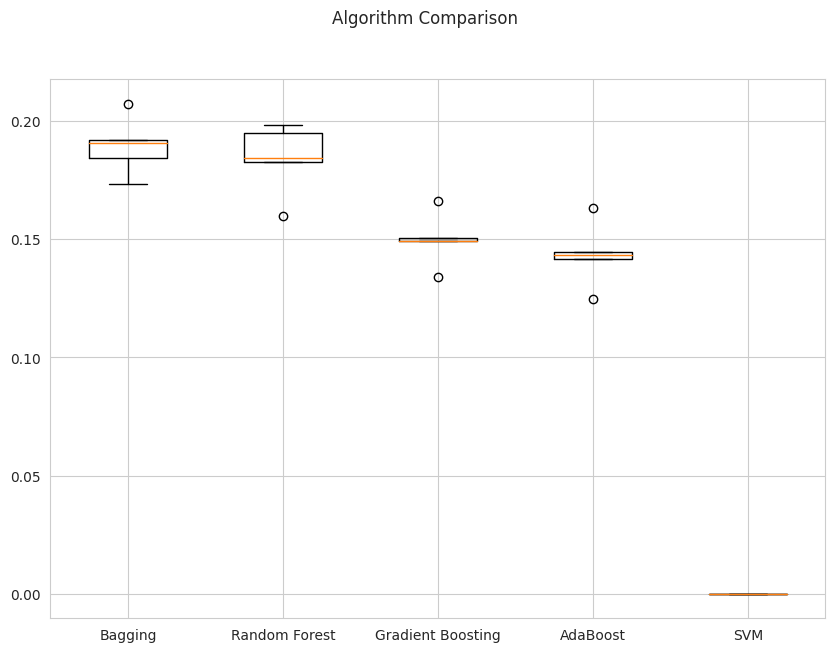

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building - Oversampled Data